<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB
Column 'calls_made' ha

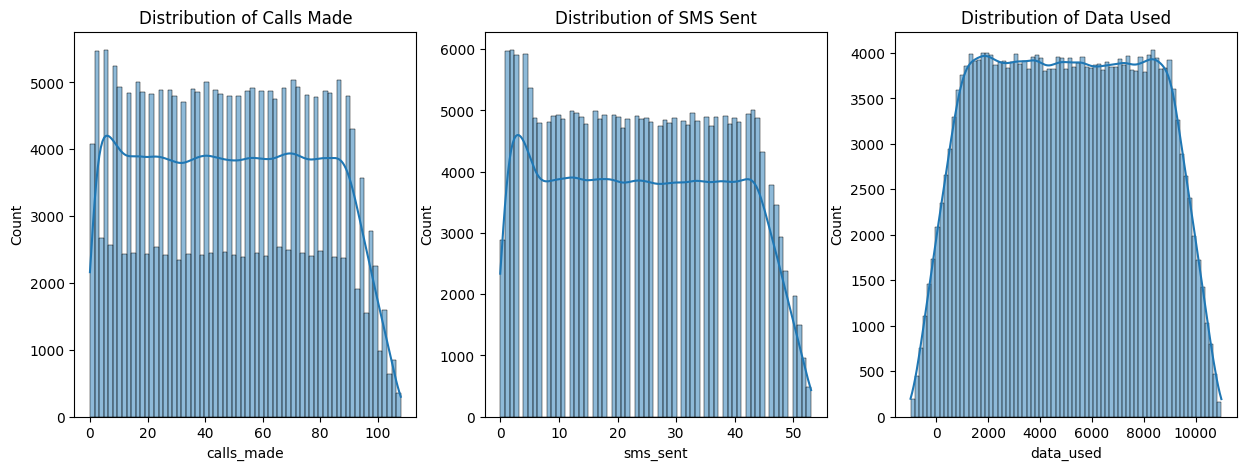

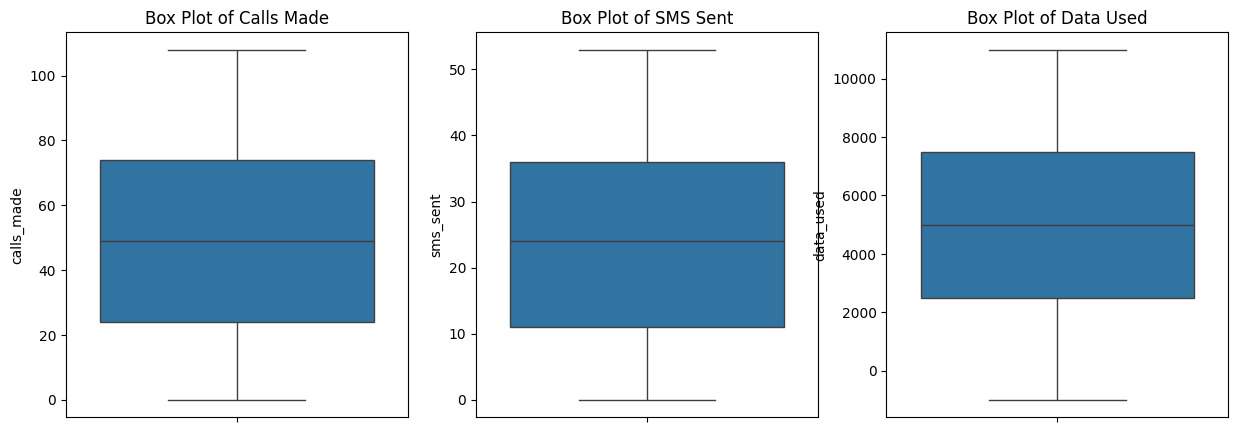

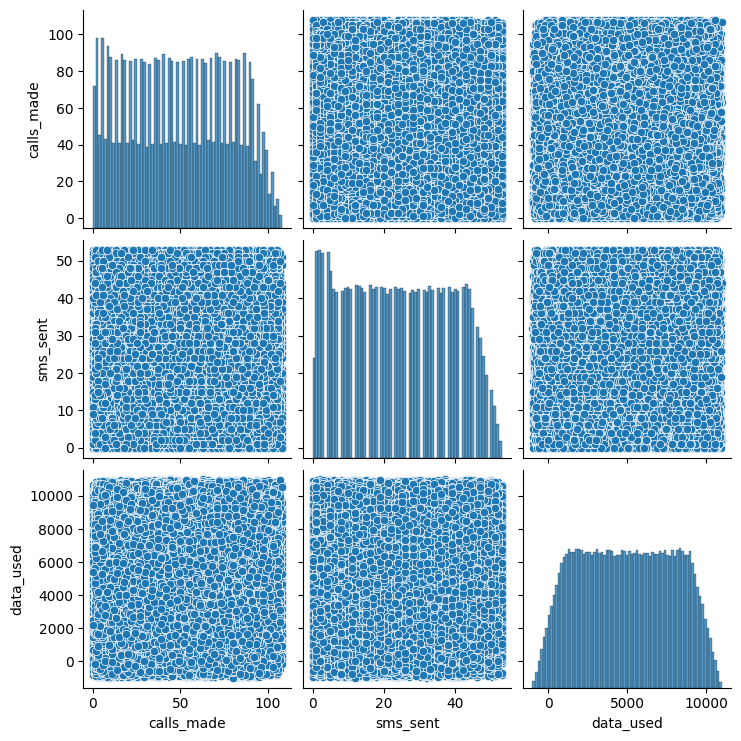

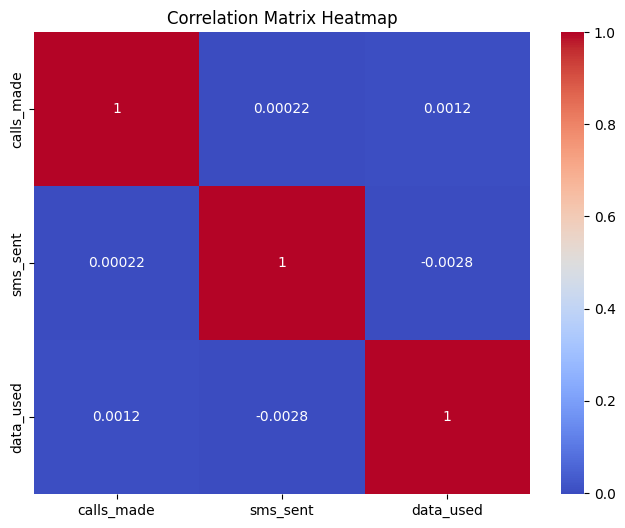

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
read_data=pd.read_csv('/content/telecom_churn.csv')


#Basic Statistics
read_data.describe()

read_data.info()


selected_cols = read_data[['calls_made', 'sms_sent', 'data_used']].isnull().sum()


#to check for negative values in ['calls_made', 'sms_sent', 'data_used'] columns



def count_negative_values(df, columns):

    negative_counts = {}
    for col in columns:
        negative_counts[col] = (read_data[col] < 0).sum()
    return negative_counts

selected_cols = ['calls_made', 'sms_sent', 'data_used']

negative_values = count_negative_values(read_data, selected_cols)

for col, count in negative_values.items():
    print(f"Column '{col}' has {count} negative values.")




# removes  negative values from  ['calls_made', 'sms_sent'] columns



read_data['sms_sent']=read_data['sms_sent'].abs()


read_data['calls_made']=read_data['calls_made'].abs()



def count_negative_values(df, columns):

    negative_counts = {}
    for col in columns:
        negative_counts[col] = (read_data[col] < 0).sum()
    return negative_counts

selected_cols = ['calls_made', 'sms_sent', 'data_used']

negative_values = count_negative_values(read_data, selected_cols)

for col, count in negative_values.items():
    print(f"Column '{col}' has {count} negative values.")


# Negative values may indecaties consumbtion level
read_data['data_used']


 #Calculate total communication usage

read_data['Total consumbtion']=read_data['calls_made']+read_data['sms_sent']

read_data['Total consumbtion'].describe()

# something ????

read_data['data_used'].describe()






selected_cols = read_data[['calls_made', 'sms_sent', 'data_used']]

# 1. Histograms ( for Distribution view)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(selected_cols['calls_made'], kde=True)
plt.title('Distribution of Calls Made')

plt.subplot(1, 3, 2)
sns.histplot(selected_cols['sms_sent'], kde=True)
plt.title('Distribution of SMS Sent')

plt.subplot(1, 3, 3)
sns.histplot(selected_cols['data_used'], kde=True)
plt.title('Distribution of Data Used')

plt.show()




# 2. Box Plots (Outliers view)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=selected_cols['calls_made'])
plt.title('Box Plot of Calls Made')

plt.subplot(1, 3, 2)
sns.boxplot(y=selected_cols['sms_sent'])
plt.title('Box Plot of SMS Sent')

plt.subplot(1, 3, 3)
sns.boxplot(y=selected_cols['data_used'])
plt.title('Box Plot of Data Used')

plt.show()






# 3. Pair Plot ( for pattern finding view)
sns.pairplot(selected_cols)
plt.show()





# 4. Heatmap for (matrix visualization)
plt.figure(figsize=(8, 6))
sns.heatmap(selected_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()












